In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

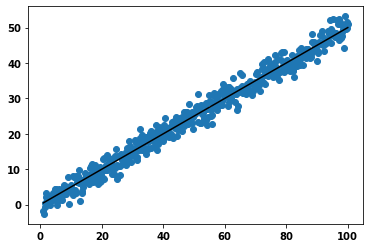

In [2]:
x = np.linspace(1,100,500)
y = 0.5*x 

sigma = 2

y_obs = y + sigma*np.random.randn(len(x))

plt.plot(x,y,'k')
plt.scatter(x,y_obs)

<ipython-input-3-14b6cea331fb>:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(chains=2, cores=1, draws=500, tune= 100, progressbar = False)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma]
Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.945398499261294, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9138795276680932, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.967,0.064,1.862,2.09,0.003,0.002,419.0,476.0,1.01


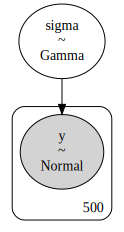

In [3]:
with pm.Model() as model:
    # Noise --------------------------------------------------------------
    sigma = pm.Gamma('sigma', mu=0.7, sigma=2)

    # Likelihood ----------------------------------------------------------
    pm.Normal('y',mu = 0.5*x, sigma = sigma, observed = y_obs)
    trace = pm.sample(chains=2, cores=1, draws=500, tune= 100, progressbar = False)
    display(pm.summary(trace))

pm.model_to_graphviz(model) 

In [19]:
from pymc3.step_methods.arraystep import BlockedStep

class SigmaStepTransformedSpace(BlockedStep):
    def __init__(self, var):
            self.vars = [var]
            self.var = var

    def step(self, point: dict):
        newpoint = point.copy()
        newpoint[self.var.transformed.name] = np.log(2)
        return newpoint

from pymc3.step_methods.arraystep import BlockedStep

class SigmaStepUntransformedSpace(BlockedStep):
    def __init__(self, var):
            self.vars = [var]
            self.var = var

    def step(self, point: dict):
        newpoint = point.copy()
        newpoint[self.var.name] = 2
        return newpoint

In [22]:
with pm.Model() as model:
    sigma = pm.Gamma('sigma', mu=0.7, sigma=2, transform = None)
    pm.Normal('y',mu = 0.5*x, sigma = sigma, observed = y_obs)
    trace = pm.sample(step = SigmaStepUntransformedSpace(sigma), chains=2, cores=1, draws=500, tune= 100, progressbar = False)
    display(pm.summary(trace))

<ipython-input-22-8434f6f75f0b>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(step = SigmaStepUntransformedSpace(sigma), chains=2, cores=1, draws=500, tune= 100, progressbar = False)
Sequential sampling (2 chains in 1 job)
SigmaStepUntransformedSpace: [sigma]
Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 0 seconds.
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_sampl

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,2.0,0.0,2.0,2.0,0.0,0.0,1000.0,1000.0,NaN


In [6]:
with pm.Model() as model:
    # Noise --------------------------------------------------------------
    sigma = pm.Normal('sigma', mu=0.7, sigma=2)

    # Likelihood ----------------------------------------------------------
    pm.Normal('y',mu = 0.5*x, sigma = sigma, observed = y_obs)
    trace = pm.sample(step = SigmaStep(sigma), chains=2, cores=1, draws=500, tune= 100, progressbar = False)
    display(pm.summary(trace))

<ipython-input-6-4f399189d203>:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(step = SigmaStep(sigma), chains=2, cores=1, draws=500, tune= 100, progressbar = False)
Sequential sampling (2 chains in 1 job)
SigmaStep: [sigma]
Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 0 seconds.
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,2.0,0.0,2.0,2.0,0.0,0.0,1000.0,1000.0,NaN
